# Predicting Covid-19 Survival Based on Patient Demographics 

# Introduction

In this workshop, we will analyze and explore a very insightful **COVID-19 dataset**.

The goal of this data science mini-project is to predict the survival of the patients' based on their demographics and health status. 

Covid-19 being a fairly recent virus, any insights would be helpful to understand potential disease risk and causes.  Data science tools and algorithms could be used in assessing the safety and quality of care provided based on the patient's risk assessment. 

Therefore, we will try to understand if the relationship between COVID-19 survival/death and some variables describing the patient's demographics such as gender, age, ethnicity, etc. Also we will explore the current trends of the death variable. **Yet, our main question is the following: Can we predict a COVID-19 patients' mortality?** 

## Content

In this workshop we will explore the following parts:

1. [Data Collection](#Data-Collection)
2. [Data Cleaning](#Data-Cleaning)
3. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
4. [Modeling](#Modeling)

## Importing Libraries

In [111]:
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
import missingno as msno

In [89]:
# HELPER FUNCTIONS
# DO NOT TOUCH THE CODE IN THIS CELL
def draw_pie(df, variable, title):
    plt.figure(figsize=(20,10))
    plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
    plt.subplot(141)
    plt.title(title,fontsize = 20)
    df[variable].value_counts().plot.pie(autopct="%1.1f%%")
    
def draw_barplot(data, variable, orient='v'):
    if orient=='v':
        a=sns.countplot(data[variable])
    else:
        a=sns.countplot(y=data[variable], data=data, orient=orient)
    a.set_xlabel(variable,fontsize=30)
    a.set_ylabel("Number of cases",fontsize=20)
    a.tick_params(labelsize=25)

    
def draw_barplot_with_hue(data, variable, h):
    b = sns.countplot(x = variable,  data = data, hue = h, palette = 'Set1')
    b.set_xlabel(variable,fontsize=30)
    b.set_ylabel("Number of cases",fontsize=20)
    b.tick_params(labelsize=25)

# Part1.  Data Collection 

In this workshop, we will skip the data collection step from the data science process, and use a readily available dataset: The <a href="https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data/vbim-akqf"> 
dataset </a>. This dataset is provided from <a href="https://www.cdc.gov">Centers for Disease Control and Prevention</a>. This organization runs a COVID-19 case surveillance system database that is based in the US. 

CDC have worked on developing technology to help ensure that disease reporting systems are integrated in US states. 

This reporting system initiated this rich dataset that includes individual-level data reported of confirmed and probable cases of COVID-19. 

The dataset consist of 8 columns labelled as:

- **case_status**: Laboratory-confirmed case; Probable case
- **sex**: Male; Female; Other
- **age_group**: 0 - 9 Years; 10 - 19 Years; 20 - 39 Years; 40 - 49 Years; 50 - 59 Years; 60 - 69 Years; 70 - 79     Years; 80 + Years
- **Race and ethnicity**: Hispanic/Latino; American Indian / Alaska Native, Non-Hispanic; Asian, Non-Hispanic; Black, Non-Hispanic; Native Hawaiian / Other Pacific Islander, Non-Hispanic; White, Non-Hispanic; Multiple/Other, Non-Hispanic
- **medcond**: Presence of underlying comorbidity or disease
- **hospitalized**: Hospitalization status (Y/N)
- **icu**: Intensive Care Unit admission status (Y/N)
- **death**: Death status (Y/N)

## 1. Run the cell below to load and read the dataset

In [2]:
data = pd.read_csv("https://github.com/ladyhodhod/Ibtikar21_DS/blob/main/COVID-19_Case_Surveillance_Public_Use_Data_mini.csv.zip?raw=true",compression='zip')

In order to display the content of this dataset, we can use the code in the cell below. When you run it, you will see random sample of recorded cases.

In [92]:
data.sample(3)

,case_status,sex,age_group,race_ethnicity,hospitalized,icu,death,medcond
1538053,Laboratory-confirmed case,Male,30 - 39 Years,Hispanic/Latino,Missing,Missing,No,No
1675793,Laboratory-confirmed case,Male,30 - 39 Years,"Multiple/Other, Non-Hispanic",Yes,No,No,Yes
22283,Laboratory-confirmed case,Male,0 - 9 Years,Unknown,No,Missing,Missing,Missing


In [93]:
print ("Our dataset contains:", "{:,}".format(data.shape[0]), "examples of COVID-19 recorded patients")

Our dataset contains: 1,912,328 example of COVID-19 recorded patients


In order to get a detailed description of each variable/field, run the cell below.

In [26]:
data.describe().T

,count,unique,top,freq
case_status,1912328,2,Laboratory-confirmed case,1852767
sex,1912328,5,Female,1012053
age_group,1912328,10,20 - 29 Years,378045
race_ethnicity,1912328,9,"White, Non-Hispanic",879058
hospitalized,1912328,4,No,1369292
icu,1912328,4,Missing,853188
death,1912328,4,No,1187408
medcond,1912328,4,No,633049


# Part 2. Data Cleaning

In its original full version, this dataset had 5 million entries of data with lots of missing values. Given the huge dataset, we had the flexibility to eliminate all rows with missing data. We will also dropped some other details like dates to make the case simpler.

### Exercise: Run the following cell to check if there is any missing values for each variable in the dataset! 

### What do you observe? Discuss your observation with your teammates. 

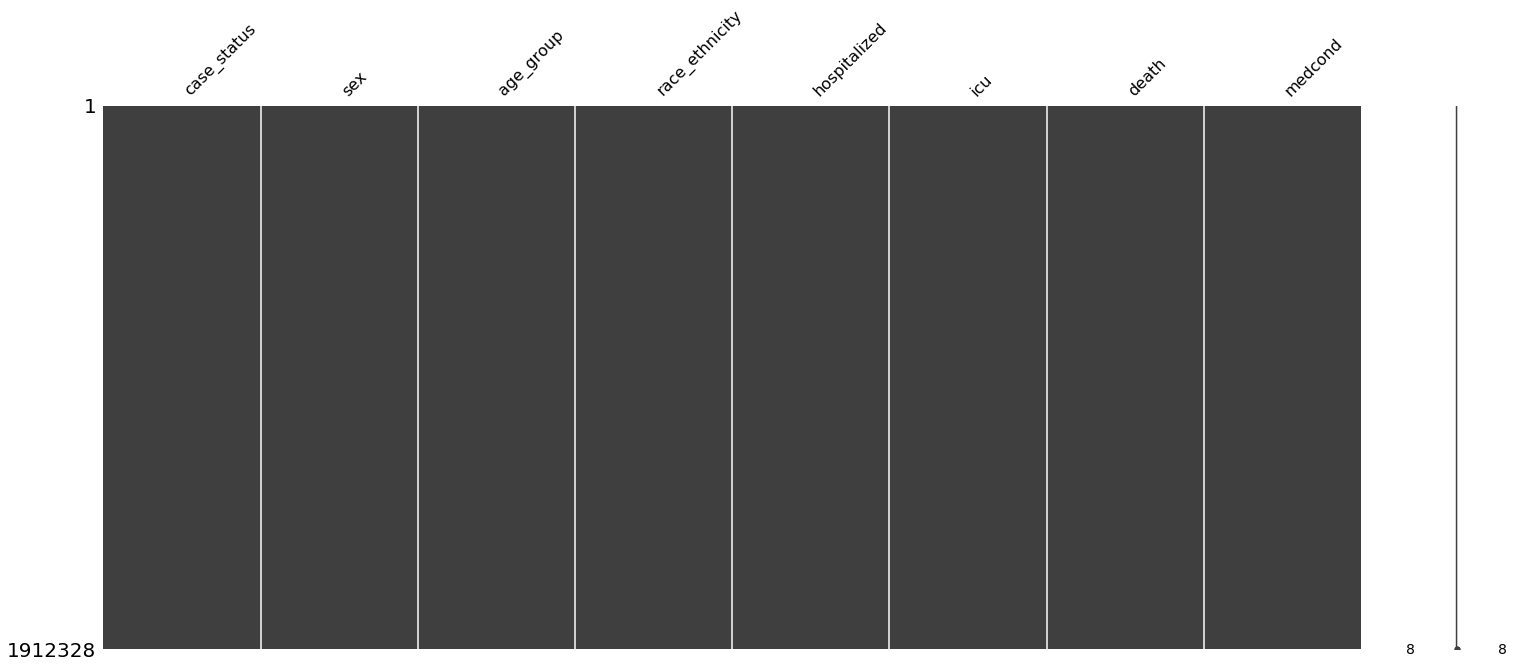

In [5]:
msno.matrix(data)

This visual summary shows that there is not much of missing values for each of the variables we are studying.
Let's explore this further!

Run the cell below to count missing values in our dataset.

In [25]:
data.isnull().sum()

case_status       0
sex               0
age_group         0
race_ethnicity    0
hospitalized      0
icu               0
death             0
medcond           0
dtype: int64

The numbers above show clearly that there are no null missing values in our dataset. This means that for every patient recorded, all the descriptors are indicated. 

Let's confirm this by looking at each field separately!

We start with the variable `sex`. In the following cell, we will count the number of unique values in the column `sex`. Basically we would like to check if there are cases for which the sex was missing, and a value different than Null was assigned instead.

In [6]:
pd.DataFrame(data.sex.value_counts())

,sex
Female,1012053
Male,886857
Unknown,10659
Missing,2683
Other,76


### Exercise: Explore the missing values for the variable `race_ethnicity`.

In [7]:
### Write your code here!

Let's visualize each of them!

In [8]:
search_values= ['Missing', 'Unknown']
Missingdata=data[data.sex.str.contains('|'.join(search_values ))]

In [9]:
Missingdata.sample(10)

,case_status,sex,age_group,race_ethnicity,hospitalized,icu,death,medcond
960109,Laboratory-confirmed case,Missing,Unknown,Unknown,No,Unknown,No,No
1837888,Laboratory-confirmed case,Unknown,40 - 49 Years,"White, Non-Hispanic",Missing,Missing,No,No
97982,Laboratory-confirmed case,Missing,50 - 59 Years,Missing,Missing,Missing,Missing,Missing
566389,Laboratory-confirmed case,Unknown,20 - 29 Years,Unknown,No,Missing,Missing,Missing
1329377,Laboratory-confirmed case,Unknown,50 - 59 Years,Unknown,No,Missing,Missing,Missing
275435,Laboratory-confirmed case,Unknown,30 - 39 Years,Unknown,No,Missing,Missing,Missing
200169,Laboratory-confirmed case,Unknown,60 - 69 Years,Unknown,Unknown,Unknown,Unknown,Unknown
1100149,Laboratory-confirmed case,Unknown,10 - 19 Years,"White, Non-Hispanic",No,Missing,No,No
672065,Laboratory-confirmed case,Unknown,50 - 59 Years,Unknown,No,Missing,Missing,Missing
411394,Laboratory-confirmed case,Unknown,70 - 79 Years,"White, Non-Hispanic",Yes,No,No,No


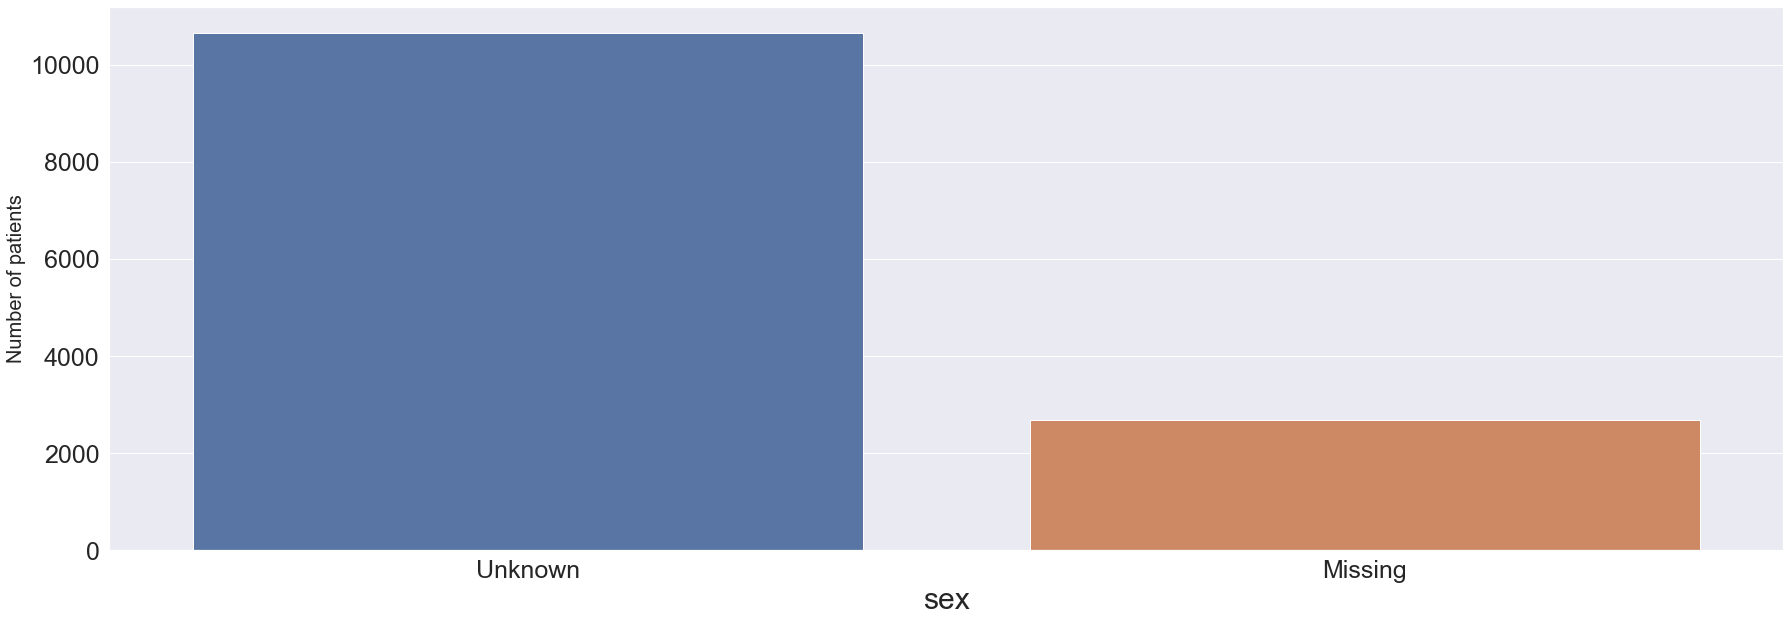

In [76]:
draw_barplot(Missingdata, 'sex')

### Exercise: Let's check the race_ethnicity variable. Run the cell below to generate the distribution of the recorded patient's race and ethnicity. What do you observe?

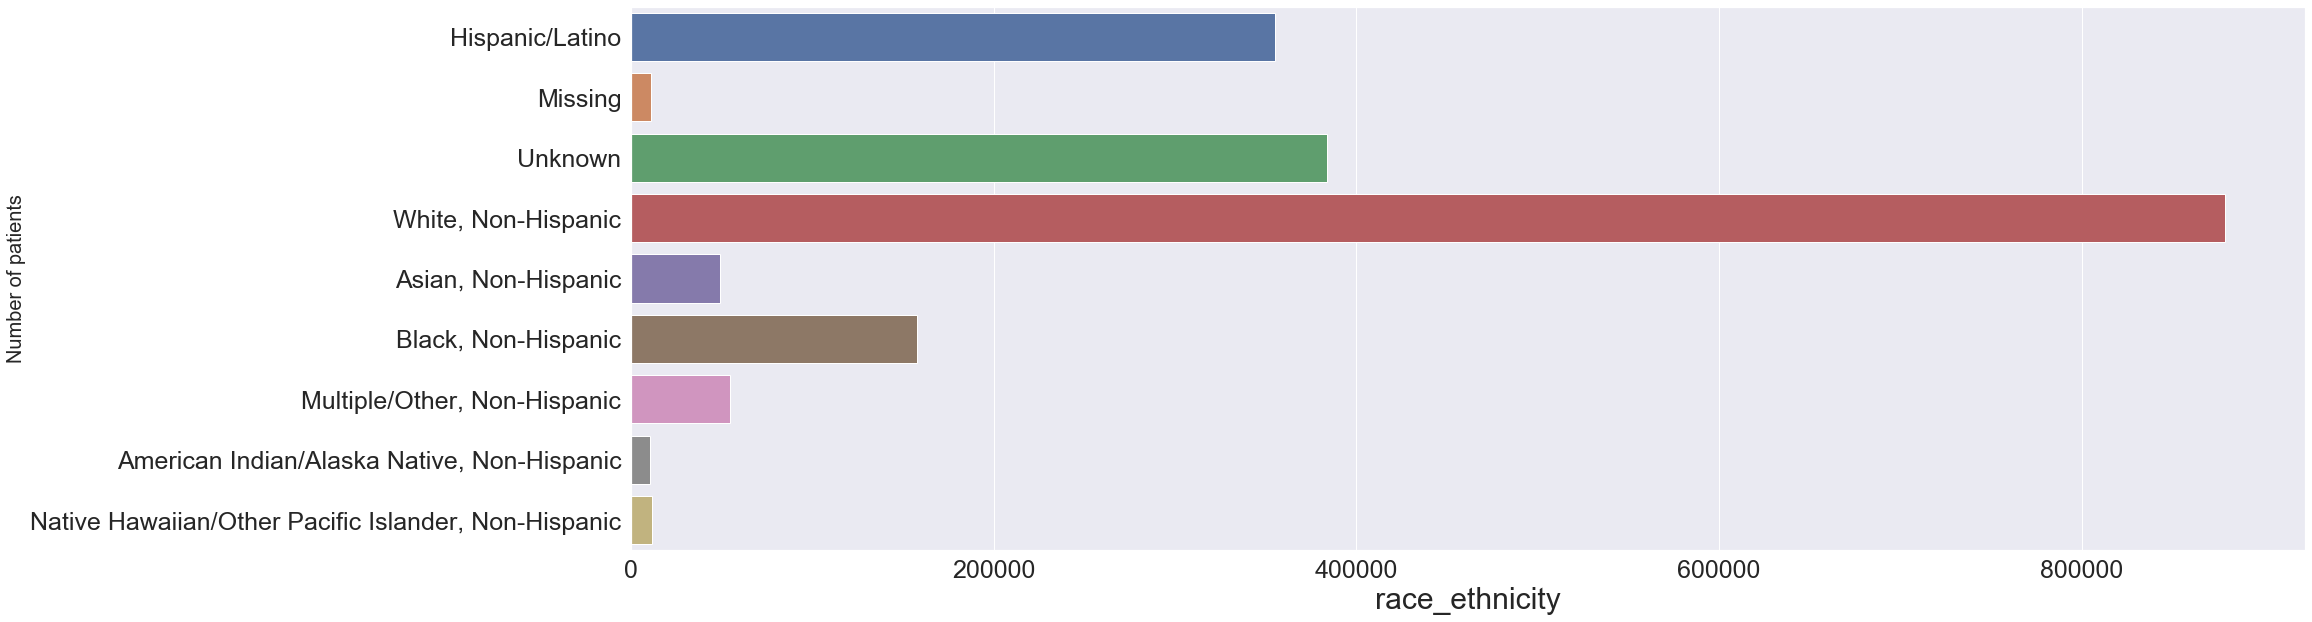

In [86]:
draw_barplot(data, 'race_ethnicity', 'h')

These distributions of variables with missing data shows us that a huge portion of patients didn't have their ethnicity/race logged in. Similarly with the death varible, a lot of the entries did not have the death variable logged in.

### Exercise:  Let's check the `death` variable. Run the cell below to generate the distribution of death vs. non death in the recorded cases. What do you observe? How many COVID-19 affected patients survived? How many of them passed away?

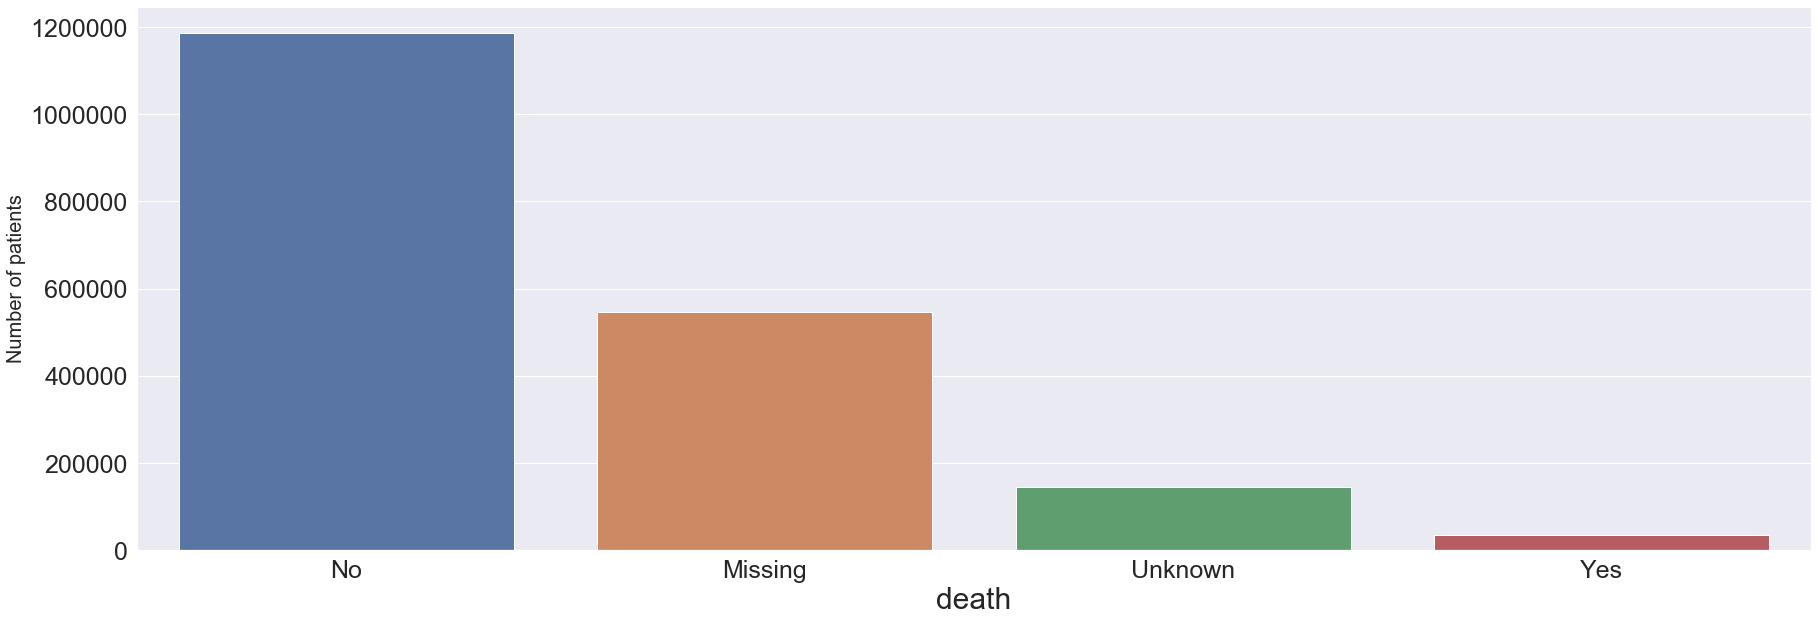

In [88]:
draw_barplot(data, 'death')


### Exercise: What do you think is the effect of missing data on the analysis? What would be a good strategy to fix this issue?

In Data Science, missing data poses a serious challenge to the whole study. Hence, However, for the sake of practicality, we follow the most basic strategy to clean the data from Missing values: Dropping them all. 

Please note that this is a very dangerous decision, as we might end up with a very small dataset!

Run the following cell to drop all the examples where any of the variables have a value of `Missing` or `Unknown`. 

We store the result in a new data that we call `clean_data`

In [13]:
todrop= ['Missing', 'Unknown']

clean_data = data[~data['age_group'].isin(todrop) & ~data['sex'].isin(todrop) & ~data['race_ethnicity'].isin(todrop) & ~data['hospitalized'].isin(todrop) & ~data['icu'].isin(todrop) & ~data['death'].isin(todrop) & ~data['medcond'].isin(todrop)]
clean_data.sample(5)

,case_status,sex,age_group,race_ethnicity,hospitalized,icu,death,medcond
673855,Laboratory-confirmed case,Female,50 - 59 Years,"White, Non-Hispanic",No,No,No,No
713574,Probable Case,Female,20 - 29 Years,"White, Non-Hispanic",No,No,No,No
1431583,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,No,No,No,No
358646,Laboratory-confirmed case,Female,30 - 39 Years,"White, Non-Hispanic",No,No,No,No
140600,Laboratory-confirmed case,Male,60 - 69 Years,"White, Non-Hispanic",No,No,No,Yes


# Part 3. Exploratory Data Analysis

In this section, we will explore the trends and correlations of the variables against the death variable. We will first look at the distributions of our variables. Since all the variables are categorical, we will create bar charts.

### Let's plot again the death vs. survival distribution. What do you observe?

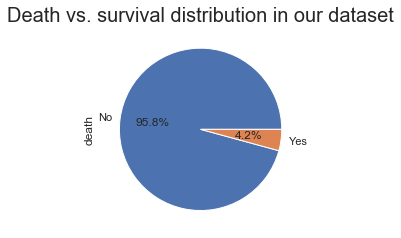

In [45]:
draw_pie(clean_data, 'death', 'Death vs. survival distribution in our dataset')

To get the specific value counts representing the number of examples in each class (death vs. no death), run the following cell.

In [46]:
#final number of true cases
clean_data.death.value_counts()

No     346783
Yes     15349
Name: death, dtype: int64

To get the counts in the form of percentages, run the following cell

In [47]:
clean_data.death.value_counts(normalize=True)

No     0.957615
Yes    0.042385
Name: death, dtype: float64

### It is your turn: Using a the `draw_pie() ` function (just like we did for the death variable), explore the distribution of cases per sex. What do you observe?

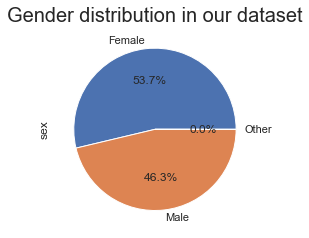

In [69]:
# the draw_pie function requires 3 paramaters: the dataset, the variable to be explored, and the title of the plot.
draw_pie(clean_data, 'sex', 'Gender distribution in our dataset')

### It is your turn: Using a the `draw_pie() ` function (just like we did for the death variable), explore the distribution of cases per age_group. What do you observe?


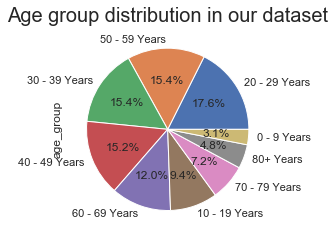

In [48]:
# write your code here.
draw_pie(clean_data, 'age_group', 'Age group distribution in our dataset')

This does not look good, and is not easy to read.
Let's explore another kind of a plot: Bar plots

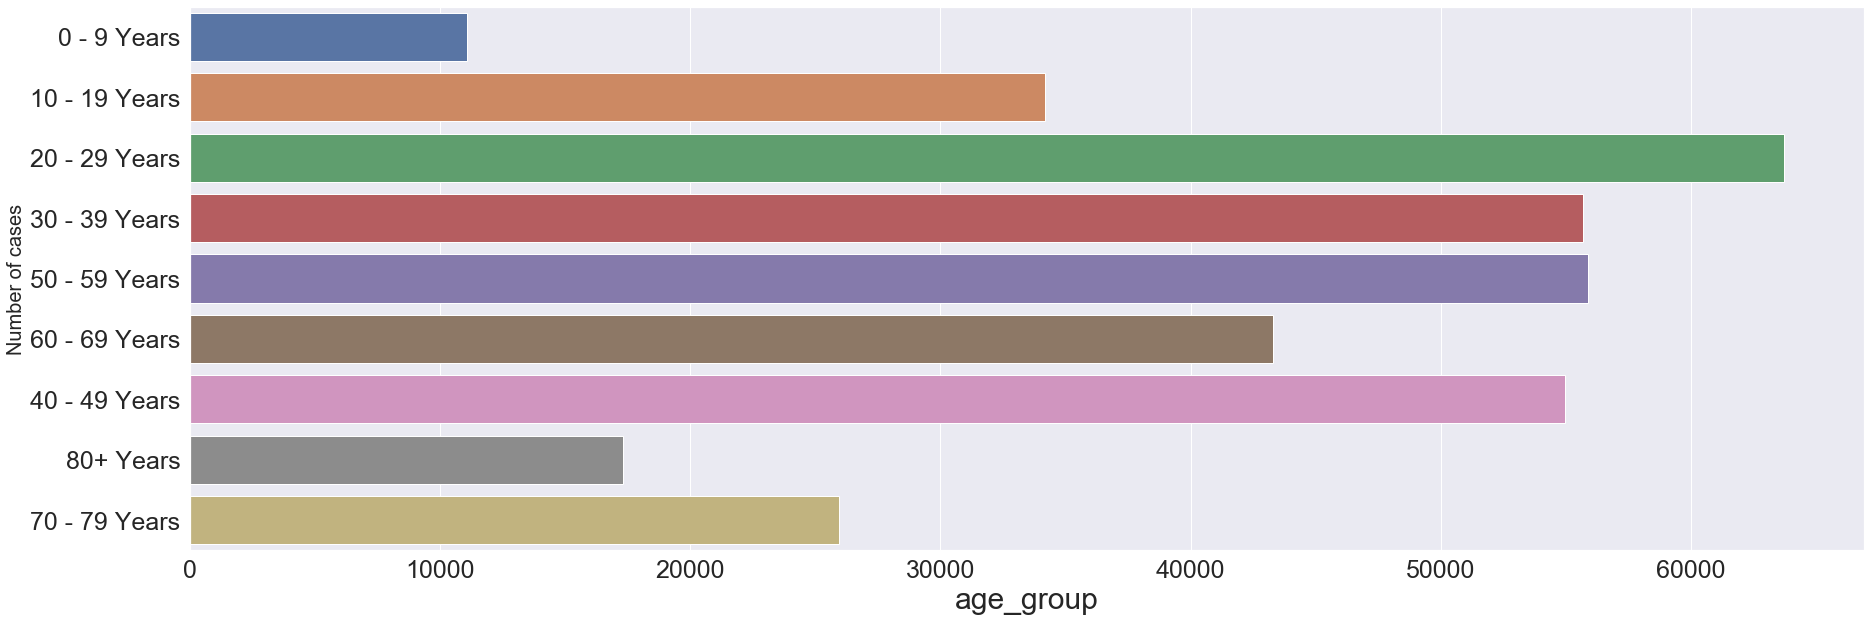

In [90]:
draw_barplot(clean_data, 'age_group', 'h')

Youpiii! This looks nicer, cleaner and easier to read and interpret. What do you observe?

Let's explore the number of registered cases per ethnicty. To do so, complete the code in the cell below. What do you observe?

In [ ]:
# Replace 'age_group' with 'race_ethnicity' in the following line:
draw_barplot(clean_data, 'age_group')

Let's explore the number of hospitalized cases per age group. To do so, run the code in the cell below. What do you observe?

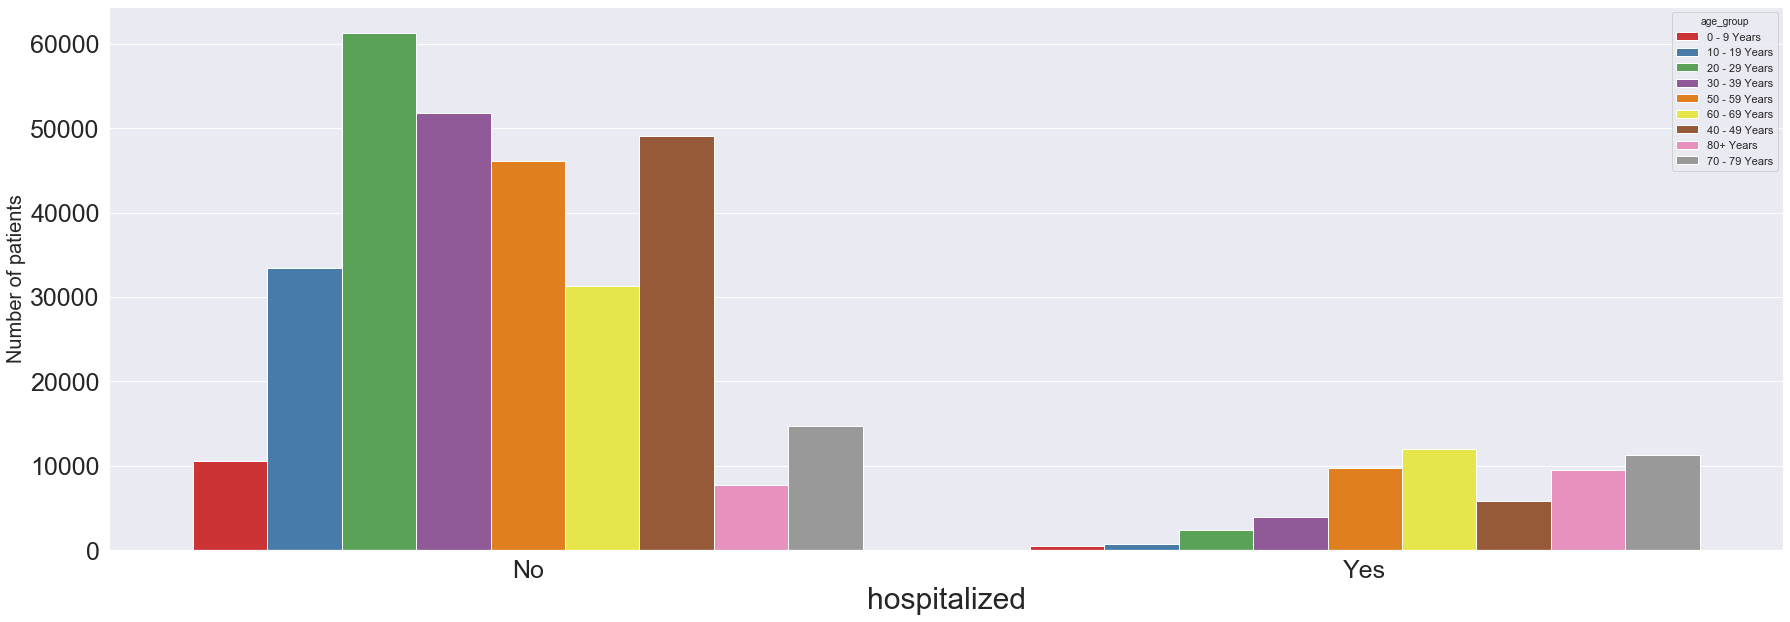

In [66]:
draw_barplot_with_hue(clean_data, 'hospitalized', 'age_group')

Now, let's draw the same plot but exploring the number of hospitalized cases having an underlying comorbidity or disease.
Run the code in the cell below. How can you interpret the results obtained?

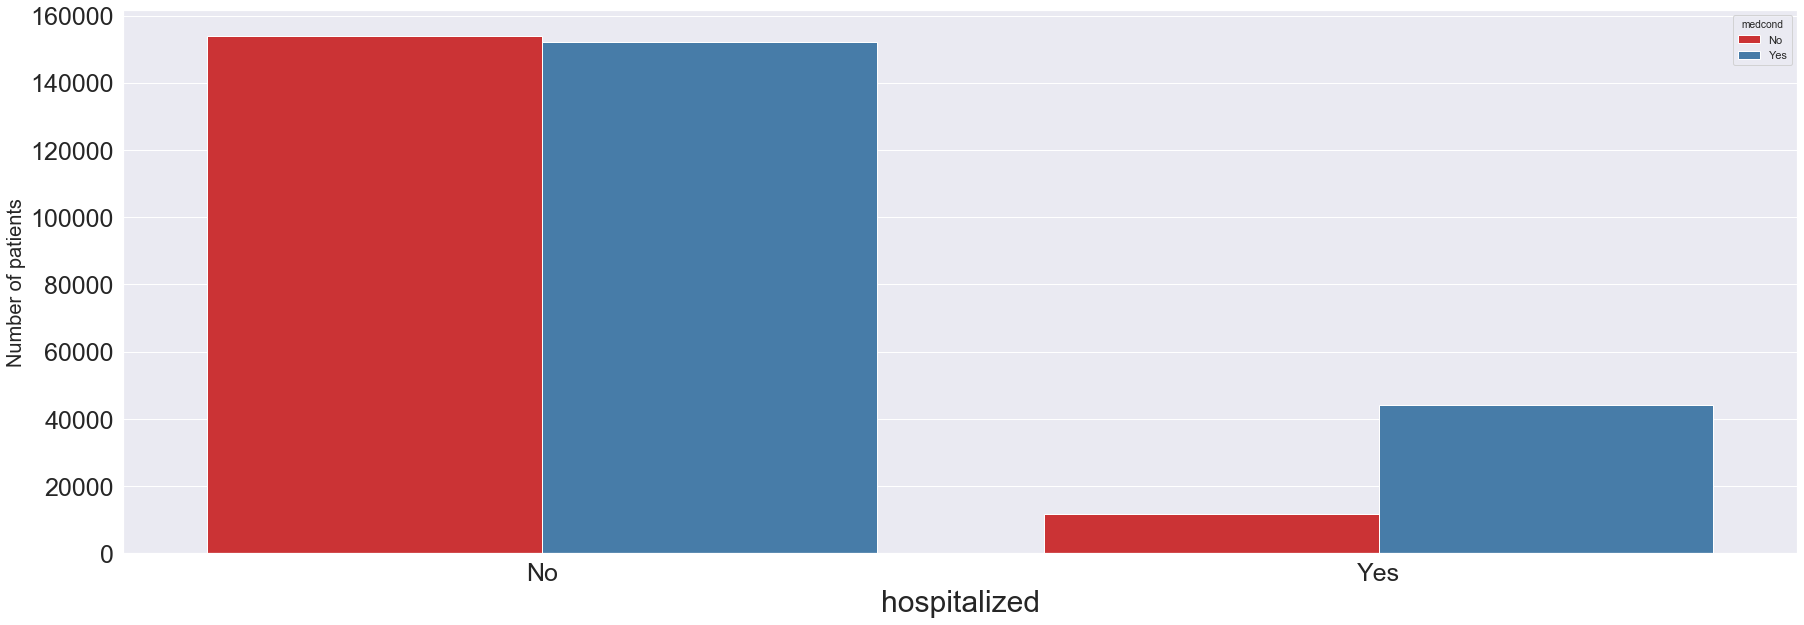

In [67]:
draw_barplot_with_hue(clean_data, 'hospitalized', 'medcond')

### Question: Which conclusions can we draw from the plots and variables explored above? For the `medcond` what  do you think is missing? what would be great to have, to help understand the effect of a medical condition compared to another?

Throughout the analysis of the distributions we can make few observations:

- Most of the registered covid cases are of people of age  20-29.
- A huge amount of the registered cases are people of the race white.
- Approximately, at least 6% of the registered patients are dead. 
- There are more cases of females than males in this dataset. 

Now, let's focus on the death variable and its values, also how is its value depending on the rest of the fields/variables.

### Exploring each of the  variables against the death variable

The following cell, contains code that will generate a diagram showing the age categories Survival distribution.

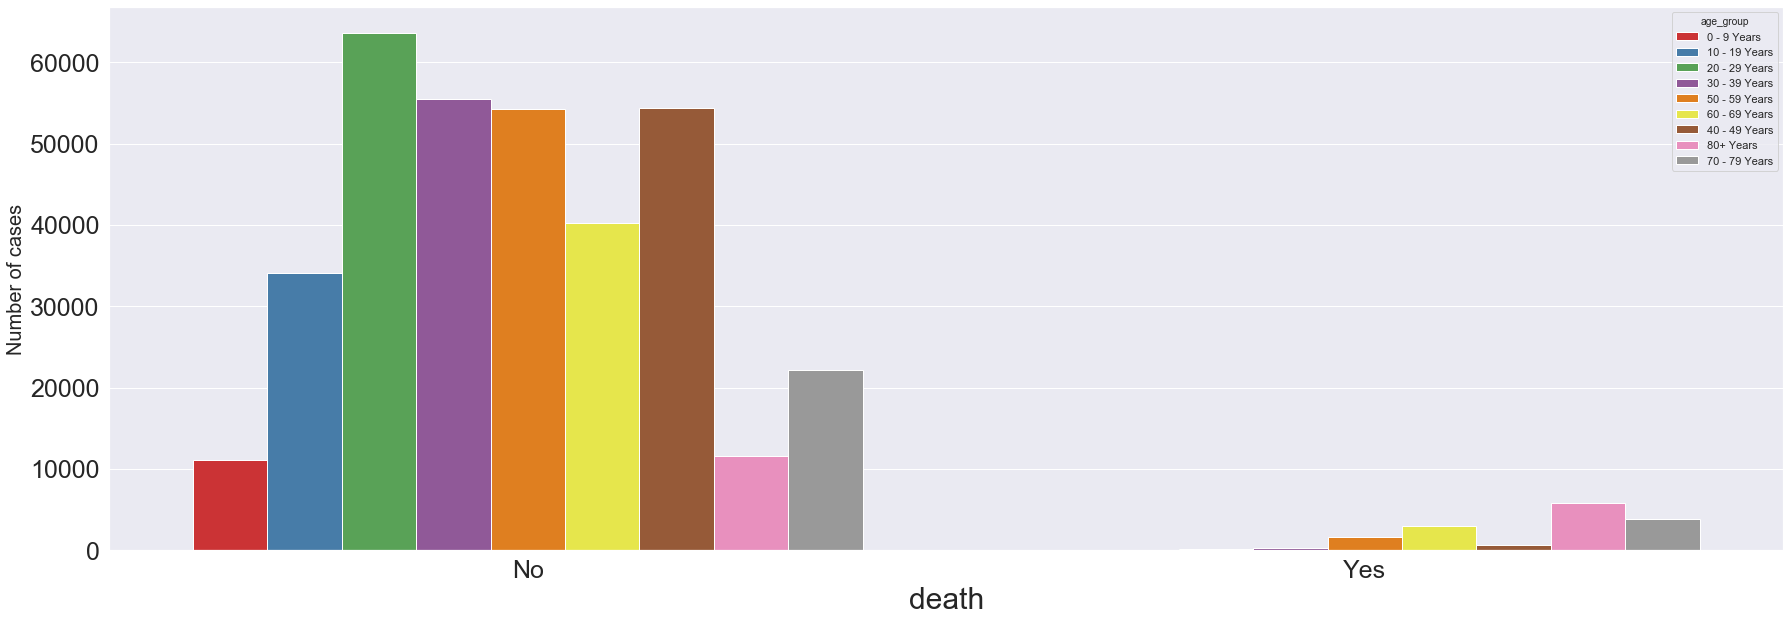

In [99]:
draw_barplot_with_hue(clean_data, 'death', 'age_group')

### It is your turn: copy the code from the cell above, and generate the survival distribution per gender (think of using the `sex` variable instead of `age_group`.

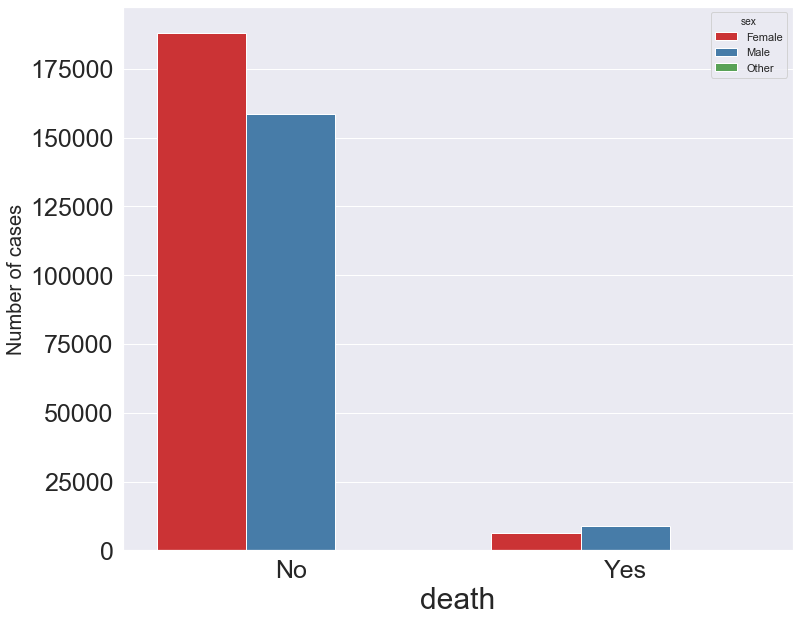

In [102]:
draw_barplot_with_hue(clean_data, 'death', 'sex')

### It is your turn: copy the code from the cell above, and generate the survival distribution per race and ethnicity.

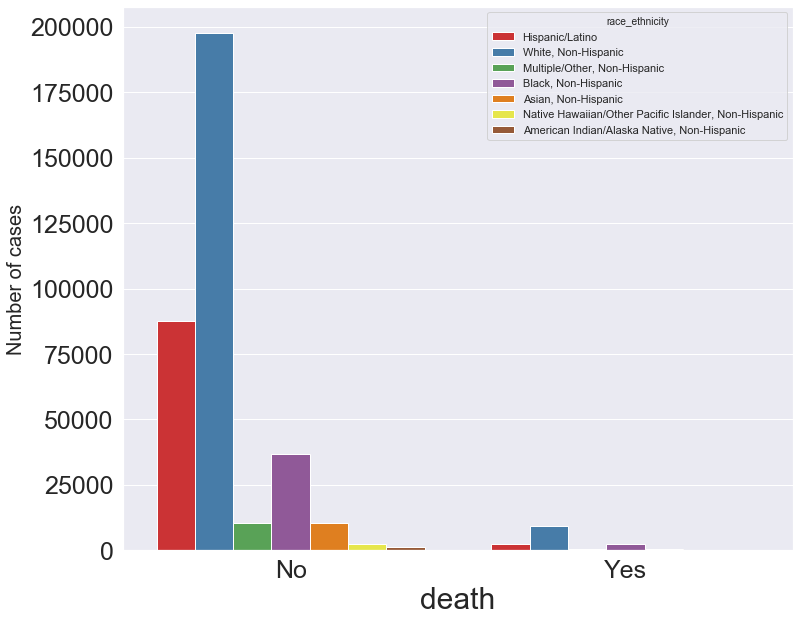

In [103]:
draw_barplot_with_hue(clean_data, 'death', 'race_ethnicity')

### It is your turn: copy the code from the cell above, and use the `draw_barplot_hue()` function to generate the survival distribution per medical condition. What do you observe?

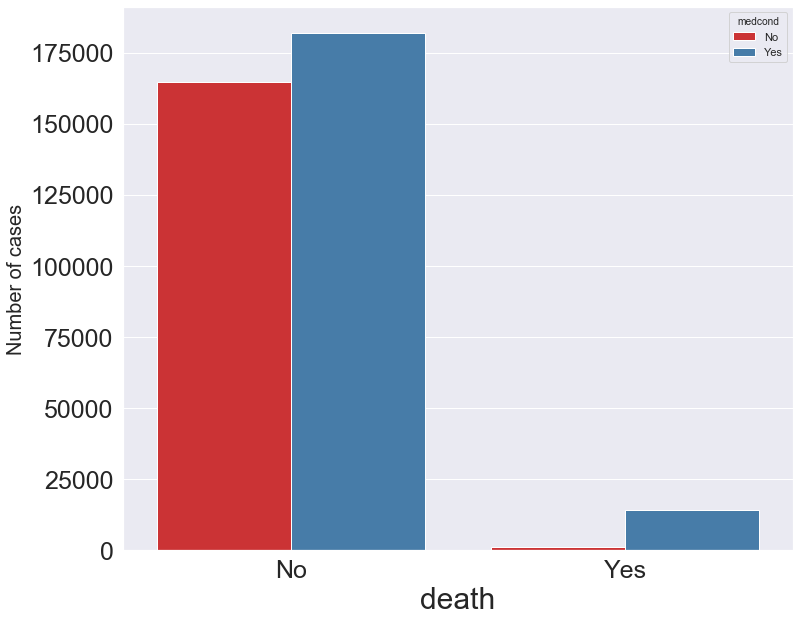

In [104]:
draw_barplot_with_hue(clean_data, 'death', 'medcond')

### What do you observe? what does this mean? Can we draw a conclusion from these plots?
These are the most common questions data scientists ask in order to get deep understanding of the dataset.
Explaining and interpreting numbers and plots and any causation or correlation relationship is one of the main tasks of a data scientist. 

Based on the graphs above, we can make the following points:

- Patients that are older than 80 had the highest number of deaths
- Males had more deaths than female even though the total number of female patients was greater
- Patients of the white race had the highest cases of death, but that is because they were the most represented in this dataset
- Almost all of the dead patients had an underlying comorbid diseases

# Part 4. Modeling

In this part, we build a model that can take a patient details ('case_status', 'sex', 'age_group', 'race_ethnicity', 'hospitalized', 'icu', 'medcond') as input and outputs a survival prediction value. 

We use Machine Learning here to build the model. 

It consists generally of two main steps: training the model and testing it. 

In order to experiment with these two steps, make sure you run the code in the cell below.

In [124]:
d = pd.get_dummies(clean_data, columns =['case_status', 'sex', 'age_group', 'race_ethnicity', 'hospitalized', 'icu', 'medcond'])

labels = np.array(np.where(d.death.values == 'Yes', 1, 0))
features = d.drop(['death'], axis = 1)
feature_list = list(features.columns)
features = np.array(features)

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2)

Standardisation = preprocessing.StandardScaler() 
train_features = Standardisation.fit_transform(train_features) 

logisticRegr = LogisticRegression()
logisticRegr.fit(train_features, train_labels) 

pred_lr = logisticRegr.predict(test_features)

In [125]:
print("predicted values for the 10 first cases:", pred_lr[:10])

predicted values for the 10 first cases: [0 0 0 0 0 0 0 0 0 0]


## Conclusion

We hope this work inspires future research in predicting deaths, not only for Covid-19 but for other critical diseases as well. As much as the data and the feature importance results were insightful, it would have been interesting to know which specific medical conditions influence death cases. Unfortunately much data was not made public. Likewise, it would have been more accurate if the original data contained a bigger proportion of true cases. The limitation of imbalanced data should be taken into account when doing future work with this project. Nonetheless, we believe this project has important real-life implications. Such a project can help improve patient risk assessments and provide better assessment of the quality of care provided by the clinic or hospital.   